In [1]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
####### This function calculates the decision border for two distributions #######
def discriminant_function_borders(x, cov_matrix1, cov_matrix2, mean1, mean2):
    ## cov_matrix1 and cov_matrix2 are the covariance matrix of the two distributions
    ## mean1 and mean2 are the mu of the two distributions
    ## x is the input data
    ## output is x2 
    
    ## source of the function formula: http://mi.eng.cam.ac.uk/~mjfg/local/4F10/lect2.pdf bottom of page5
    
    cov_matrix1_inv = np.linalg.inv(cov_matrix1)
    cov_matrix2_inv = np.linalg.inv(cov_matrix2)
    
    A = cov_matrix1 - cov_matrix2
    b = 2 * cov_matrix2.dot(mean2) - cov_matrix1.dot(mean1)

    ## we break down c into three parts
    c_1 = np.dot( np.transpose(mean1), cov_matrix1_inv).dot(mean1)
    c_2 = np.dot( np.transpose(mean2), cov_matrix2_inv).dot(mean2)
    c_3 = np.linalg.det(cov_matrix2) / np.linalg.det(cov_matrix1)
    c_3 = np.log(c_3)
    
    ## logarithm of priors are omited
    c = c_1 - c_2 - c_3
    
    
    ## to compute the x2 we need to open A and b matrixes and use their elements
    ## we devide the formula into two part (on and under the devision
    x2_on = ( A[0,0] + A[0,1] ) * x**2 + b[0,0] * x
    x2_under = -2 * b[0,1] - ( A[1,0] + A[1,1] ) * x
    
    x2 = x2_on / x2_under
    
    return x2

In [46]:
########### Plot the data countours with their dicision boundary 
def plot_contours_decision_boundary( limits, cov_matrixes, means):
    """
    this function plots the countour for multiple distributions
    length of cov_matrixes of the means is our distribution count
    """
    
    assert len(cov_matrixes) > 1, 'two distributions and more are allowed'
    assert len(cov_matrixes) == len(means), 'means and cov_matrixes should have the same length( length is our distribution count)'
    assert len(limits) == 2, 'limit is our x,y limits and must have the length of 2'
    assert len(limits[0]) == len(limits[1]), 'x,y must have the same length'
    
    distribution_count = len(cov_matrixes)
    
    
    ## use different colors
    colors = ['r','g','b','y', 'k']

            
    xmin = limits[0].min()
    xmax = limits[0].max()
    ymin = limits[1].min()
    ymax = limits[1].max()
        
    x ,y = np.mgrid[ xmin: xmax :0.1, ymin: ymax :0.1]
    
    lines = []
    for idx, cov in enumerate(cov_matrixes):
        rv = multivariate_normal(means[idx], cov)

        pos = np.dstack((x,y))
        PDF = rv.pdf(pos)
        
        line = discriminant_function_borders(x,
                                             cov_matrixes[idx],
                                             cov_matrixes[(idx+1) % distribution_count],
                                             means[idx],
                                             means[(idx+1) % distribution_count])
        lines.append(line)
        plt.contour(x, y, PDF)
        plt.plot(x, line, color= colors[idx%5])
    
    plt.xlim([ xmin, xmax ])
    plt.ylim([ ymin, ymax ])
    plt.show()
    
    return lines

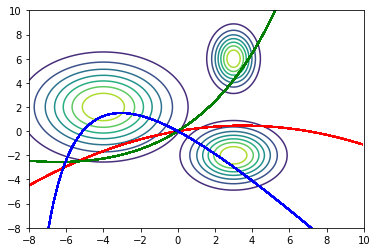

In [47]:
xlim = np.linspace(-8, 10, 200)
ylim = np.linspace(-8, 10, 200)

### First multivariate normal distribution
cov_matrix1 = np.matrix("[0.5 0; 0 2]")
mean1 = [3,6]

### Second multivariate normal distribution
cov_matrix2 = np.matrix("[2 0; 0 2]")
mean2 = [3,-2]

### third multivariate normal distribution
cov_matrix3 = np.matrix("[5 0; 0 5]")
mean3 = [-4,2]

lines = plot_contours_decision_boundary(limits= [xlim, ylim], 
                                cov_matrixes=[cov_matrix1, cov_matrix2, cov_matrix3],
                                means= [mean1, mean2, mean3] )

In [28]:
a = np.where( lines[0] == lines[2])
# np.where(lines[0] == lines[1])
# lines[0][:80]

In [44]:
lines[0][:80]

(80, 180)